In [1]:
import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
importlib.reload(NN)

<module 'NN' from '/home/bouissob/Code/NN.py'>

In [3]:
#def __init__(self, Epoch = 2, Neur_seq = '32_64_64_32', Dataset_train = ['Ocean1'], 
#             Oc_mod_type = 'COM_NEMO-CNRS', Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], 
#             Var_Y = 'meltRate', activ_fct = 'swish', Norm_Choix = 0, verbose = 1, batch_size = 32, Extra_n = '')

In [4]:
#Test = NN.model_NN(Epoch = 1, Neur_seq = '4_2')
#Test.train()

In [5]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']

In [6]:
importlib.reload(NN)
Training = NN.Sequencial_training(NN.model_NN)
#Training.Neur_seq_preview(4)

#class Sequencial_training():
    #def __init__(self, Model):
    #training(self, training_extent = 1, verbose = 1, Standard_train = ['32_64_64_32'], **kwargs)

In [80]:
Training.training(training_extent = 0, verbose = 1, batch_size = 128, 
                Dataset_train = ['Ocean2'], Epoch = 7, Var_X = Var_X2, Extra_n = '')

Projected training regiment :
 ['32_64_64_32']
Starting training for neurone : 32_64_64_32, 0/1 (Previous step : 0.000 s)
Epoch 1/7
5180/5180 [==============================] - 14s 3ms/step - loss: 0.1688 - mae: 0.0957 - mse: 0.1688 - val_loss: 0.0729 - val_mae: 0.0687 - val_mse: 0.0729
Epoch 2/7
5180/5180 [==============================] - 13s 2ms/step - loss: 0.0742 - mae: 0.0685 - mse: 0.0742 - val_loss: 0.0683 - val_mae: 0.0648 - val_mse: 0.0683
Epoch 3/7
5180/5180 [==============================] - 13s 2ms/step - loss: 0.0573 - mae: 0.0583 - mse: 0.0573 - val_loss: 0.0479 - val_mae: 0.0575 - val_mse: 0.0479
Epoch 4/7
5180/5180 [==============================] - 13s 2ms/step - loss: 0.0453 - mae: 0.0525 - mse: 0.0453 - val_loss: 0.0342 - val_mae: 0.0453 - val_mse: 0.0342
Epoch 5/7
5180/5180 [==============================] - 13s 2ms/step - loss: 0.0393 - mae: 0.0482 - mse: 0.0393 - val_loss: 0.0338 - val_mae: 0.0490 - val_mse: 0.0338
Epoch 6/7
5180/5180 [===========================

In [25]:
importlib.reload(NN)
#NN.Plot_loss_model(ind = 1, Epoch = 6)

<module 'NN' from '/home/bouissob/Code/NN.py'>

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_']
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Data variables used : x y temperatureYZ salinityYZ iceDraft
[1.08062184]0 / 1200


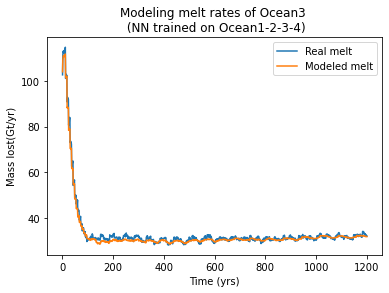

In [81]:
NN.Plot_Melt_time_function(ind = 0,save = True, Epoch = 5, message = 1, 
                    Exact = 1, Ocean_trained = OcT, Ocean_target = 'Ocean3', Extra_n = [])

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_']
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646123111_Ex_
Data variables used : x y temperatureYZ salinityYZ iceDraft
[0.12382607]0 / 1200


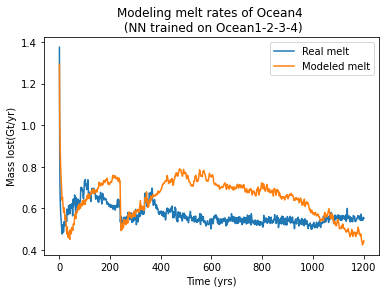

In [82]:
NN.Plot_Melt_time_function(ind = 0,save = True, Epoch = 5, message = 1, Exact = 1, 
                           Ocean_trained = OcT, Ocean_target = 'Ocean4', Extra_n = [])

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_5_N_32_64_64_32_Ch_0-1646043224_Ex_InitVar
Data variables used : x y thermalDriving halineDriving iceDraft


(array([-2.6664182e-08, -4.7384000e-10]),
 array([1.5493589e-07, 1.5731842e-07]))

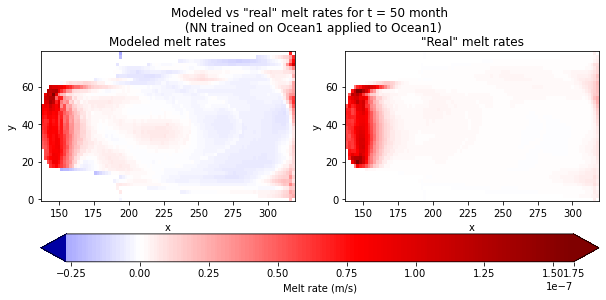

In [69]:
importlib.reload(NN)
NN.Plotting_side_by_side(ind = 0,save = True, Epoch = 5, T = 50, Ocean_target = 'Ocean1', 
            Extra_n = ['InitVar'], Ocean_trained = 'Ocean1')

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_5_N_32_64_64_32_Ch_0-1646041274_Ex_
Data variables used : x y temperatureYZ salinityYZ iceDraft


(array([3.07887230e-08, 2.14565432e-09]),
 array([2.1898256e-06, 2.4486892e-06]))

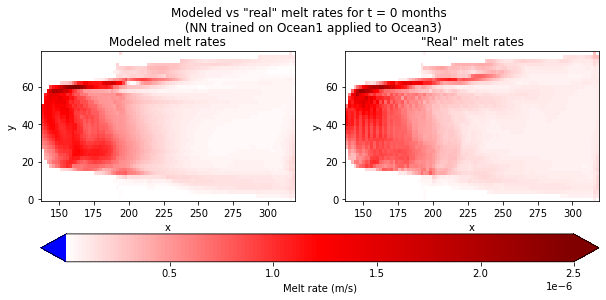

In [106]:
NN.Plotting_side_by_side(ind = 0,save = False ,
                        Epoch = 5, T = 0, Ocean_target = 'Ocean3')

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_12
Starting 1/24 model Ep_12_N_1_Ch_0-1646054833_Ex_
Starting 2/24 model Ep_12_N_4_Ch_0-1646054967_Ex_
Starting 3/24 model Ep_12_N_8_Ch_0-1646055101_Ex_
Starting 4/24 model Ep_12_N_16_Ch_0-1646055235_Ex_
Starting 5/24 model Ep_12_N_4_16_Ch_0-1646055371_Ex_
Starting 6/24 model Ep_12_N_8_16_Ch_0-1646055514_Ex_
Starting 7/24 model Ep_12_N_16_16_Ch_0-1646055657_Ex_
Starting 8/24 model Ep_12_N_4_32_Ch_0-1646055801_Ex_
Starting 9/24 model Ep_12_N_8_32_Ch_0-1646055943_Ex_
Starting 10/24 model Ep_12_N_16_32_Ch_0-1646056086_Ex_
Starting 11/24 model Ep_12_N_4_64_Ch_0-1646056234_Ex_
Starting 12/24 model Ep_12_N_8_64_Ch_0-1646056381_Ex_
Starting 13/24 model Ep_12_N_16_64_Ch_0-1646056529_Ex_
Starting 14/24 model Ep_12_N_8_32_64_Ch_0-1646056717_Ex_
Starting 15/24 model Ep_12_N_16_32_64_Ch_0-1646056926_Ex_
Starting 16/24 model Ep_12_N_32_32_64_Ch_0-1646057101_Ex_
Starting 17/24 model Ep_12_N_8_64_64_Ch_0-1646057308_Ex_
Starting 18/24 model Ep_12_

TypeError: can only concatenate str (not "tuple") to str

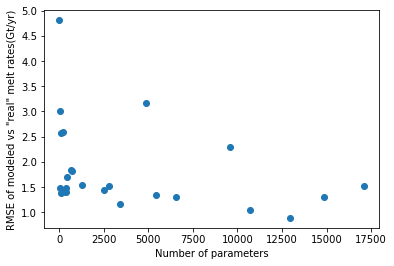

In [128]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 12, Ocean_trained = 'Ocean1', message = 0)

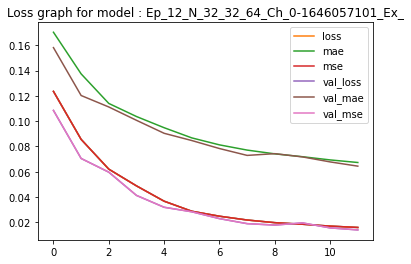

In [98]:
NN.Plot_loss_model(ind = 15, Epoch = 12, Ocean = 'Ocean1', Exact = 1) 

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_4
Starting 1/53 model Ep_6_N_1_Ch_0-1646003136
Starting 2/53 model Ep_4_N_32_64_64_32_Ch_0-1645997060
Starting 3/53 model Ep_6_N_4_Ch_0-1646003252
Starting 4/53 model Ep_6_N_8_Ch_0-1646003370
Starting 5/53 model Ep_6_N_16_Ch_0-1646003488
Starting 6/53 model Ep_6_N_4_16_Ch_0-1646003607
Starting 7/53 model Ep_6_N_8_16_Ch_0-1646003735
Starting 8/53 model Ep_6_N_16_16_Ch_0-1646003862
Starting 9/53 model Ep_6_N_4_32_Ch_0-1646003992
Starting 10/53 model Ep_6_N_8_32_Ch_0-1646004120
Starting 11/53 model Ep_6_N_16_32_Ch_0-1646004251
Starting 12/53 model Ep_6_N_4_64_Ch_0-1646004380
Starting 13/53 model Ep_6_N_8_64_Ch_0-1646004510
Starting 14/53 model Ep_6_N_16_64_Ch_0-1646004638
Starting 15/53 model Ep_6_N_8_32_64_Ch_0-1646004769
Starting 16/53 model Ep_6_N_16_32_64_Ch_0-1646004917
Starting 17/53 model Ep_6_N_32_32_64_Ch_0-1646005063
Starting 18/53 model Ep_6_N_8_64_64_Ch_0-1646005213
Starting 19/53 model Ep_6_N_16_64_64_Ch_0-1646005365
Star

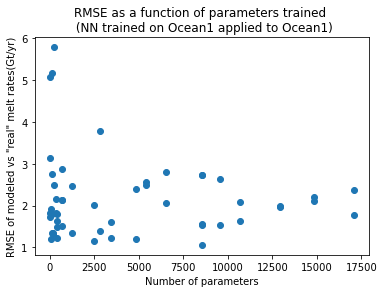

In [51]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = True, Epoch = 4, Ocean_trained = 'Ocean1', message = 0)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_12
Starting 1/24 model Ep_12_N_1_Ch_0-1646054833_Ex_
Starting 2/24 model Ep_12_N_4_Ch_0-1646054967_Ex_
Starting 3/24 model Ep_12_N_8_Ch_0-1646055101_Ex_
Starting 4/24 model Ep_12_N_16_Ch_0-1646055235_Ex_
Starting 5/24 model Ep_12_N_4_16_Ch_0-1646055371_Ex_
Starting 6/24 model Ep_12_N_8_16_Ch_0-1646055514_Ex_
Starting 7/24 model Ep_12_N_16_16_Ch_0-1646055657_Ex_
Starting 8/24 model Ep_12_N_4_32_Ch_0-1646055801_Ex_
Starting 9/24 model Ep_12_N_8_32_Ch_0-1646055943_Ex_
Starting 10/24 model Ep_12_N_16_32_Ch_0-1646056086_Ex_
Starting 11/24 model Ep_12_N_4_64_Ch_0-1646056234_Ex_
Starting 12/24 model Ep_12_N_8_64_Ch_0-1646056381_Ex_
Starting 13/24 model Ep_12_N_16_64_Ch_0-1646056529_Ex_
Starting 14/24 model Ep_12_N_8_32_64_Ch_0-1646056717_Ex_
Starting 15/24 model Ep_12_N_16_32_64_Ch_0-1646056926_Ex_
Starting 16/24 model Ep_12_N_32_32_64_Ch_0-1646057101_Ex_
Starting 17/24 model Ep_12_N_8_64_64_Ch_0-1646057308_Ex_
Starting 18/24 model Ep_12_

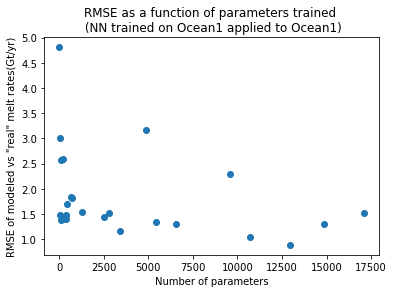

In [52]:
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = True, Epoch = 12, Ocean_trained = 'Ocean1', message = 0)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_4
Starting 1/22 model Ep_4_N_1_Ch_0-1646046062_Ex_
Starting 2/22 model Ep_4_N_4_Ch_0-1646046648_Ex_
Starting 3/22 model Ep_4_N_8_Ch_0-1646047230_Ex_
Starting 4/22 model Ep_4_N_4_16_Ch_0-1645794763
Starting 5/22 model Ep_4_N_4_16_32_Ch_0-1645795607
Starting 6/22 model Ep_4_N_16_16_32_Ch_0-1645796354
Starting 7/22 model Ep_4_N_4_32_32_Ch_0-1645797160
Starting 8/22 model Ep_4_N_16_32_32_Ch_0-1645797963
Starting 9/22 model Ep_4_N_4_16_64_Ch_0-1645798826
Starting 10/22 model Ep_4_N_16_16_64_Ch_0-1645799619
Starting 11/22 model Ep_4_N_4_32_64_Ch_0-1645800441
Starting 12/22 model Ep_4_N_16_32_64_Ch_0-1645801247
Starting 13/22 model Ep_4_N_16_32_64_64_Ch_0-1645802103
Starting 14/22 model Ep_4_N_32_32_64_64_Ch_0-1645803185
Starting 15/22 model Ep_4_N_16_Ch_0-1646047807_Ex_
Starting 16/22 model Ep_4_N_4_16_Ch_0-1646048384_Ex_
Starting 17/22 model Ep_4_N_8_16_Ch_0-1646048996_Ex_
Starting 18/22 model Ep_4_N_16_16_Ch_0-1646

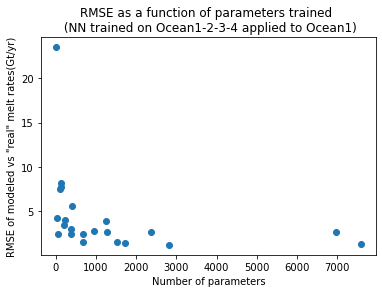

In [50]:
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(save = True, Epoch = 4, 
                        Ocean_trained = OcT, message = 0, Exact = 1)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646043224_Ex_InitVar
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646043224_Ex_InitVar
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646043224_Ex_InitVar
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646043224_Ex_InitVar


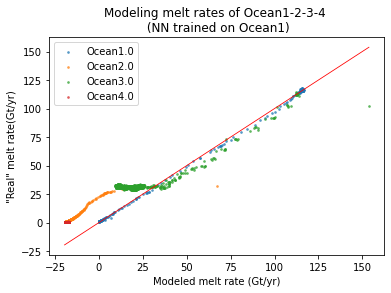

In [56]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 5, 
            Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, Exact = 1, Extra_n = ['InitVar'])

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_5
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646211345_Ex_InitVar
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646211345_Ex_InitVar
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646211345_Ex_InitVar
Starting 1/1 model Ep_5_N_32_64_64_32_Ch_0-1646211345_Ex_InitVar


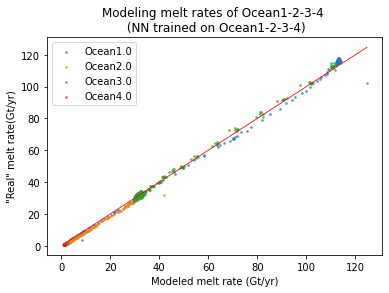

In [58]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 5, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, Exact = 1, Extra_n = ['InitVar'])

In [ ]:
Epoch, Neur, Choix = re.findall('Ep_(\d+)_N_(\w+)_Ch_(\d+)', Test)[0]

pwd = os.getcwd()
Ocean_mod = 'Ocean1'
Type = 'COM_NEMO-CNRS'
Models_path = os.path.join(pwd, 'Auto_model', Type, Ocean_mod)
li = glob.glob(Models_path + '/Ep_4*')
Test = li[0]
MeanX, StdX = pd.read_pickle(Test + '/MeanX.pkl'), pd.read_pickle(Test + '/StdX.pkl')
MeanY, StdY = np.loadtxt(Test + '/MeanY.csv'), np.loadtxt(Test + '/StdY.csv')
model = tf.keras.models.load_model(Test + '/model_4.h5')
pd.read_pickle(Test + '/TrainingHistory')